# Own implementation of the EDMD algorithm (task 2) and application to two examples (tasks 3 and 4)

The Extended Dynamic Mode Decomposition (EDMD) is a method to approximate the Koopman operator $\mathbf{K}$ and the correpsonding triples of Koopman eigenvalue, eigenfunction and mode. Where $\{(\mu_k, \phi_k, v_k)\}^K_{k=1}$ is the set of K triples required to reconstruct the full state. (See Williams et al., 2015)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
#from scipy.interpolate import griddata

### Task 2: Own implementation of the EDMD algorithm

Requirements:\
Data set with 'labeled data', i.e. $F(x_i) = y_i$\
Dictionary of observables, i.e. basisfunctions (best choice depends on data set)

In [2]:
# Calculate Koopman operator K
def calc_K(X, Y, D):
    M = np.shape(X)[1]
    # evaluate D with values from X
    phi_x = []
    for i in range(M):
        phi_x.append(D(X[0,i],X[1,i]))
    phi_x = np.array(phi_x)
    # evaluate D with value from Y
    phi_y = []
    for i in range(M):
        phi_y.append(D(Y[0,i],Y[1,i]))
    phi_y = np.array(phi_y)
    # calulate G and A matrices
    G = 1/M * phi_x.T @ phi_x
    A = 1/M * phi_x.T @ phi_y
    # solve for K
    K = np.linalg.pinv(G) @ A
    return K

In [3]:
# for debugging
myK = calc_K(X,Y,Dn)
np.shape(myK)#looks good

NameError: name 'X' is not defined

In [4]:
#Dn*5

Eigenfunction of $\mathbf{K}$: $\phi_j = \Psi \zeta_j$ with $\zeta_j$ being the j-th eigenvector of $\mathbf{K}$

In [5]:
# caluclate eigenvalues, -vectors, -functions
def calc_eig(K, D):
    eigenvalues, eigenvectors = np.linalg.eig(K)
    #print(np.shape(D))
    #eigenfunctions = D @ eigenvectors # D is the problem -> it's not possible to multiply it with anything :(
    return eigenvalues, eigenvectors#, eigenfunctions

In [6]:
#for debugging
calc_eig(myK, Dn)

NameError: name 'myK' is not defined

Koopman modes: $\mathbf{V} = (\mathbf{W}^* \mathbf{B})^T$ with $\mathbf{W}^*$ holding the inverted eigenvectors.

In [7]:
# calculate the Koopman modes
def calc_modes(eigenvectors, D):#no D?
    eigenvectors_inverted = np.linalg.inv(eigenvectors)
    B = np.zeros((np.shape(eigenvectors)[-1], 2)) #B should be (K,N) where N is dim of data points
    B[1,0] = 1# for the example from Willimas et al.
    B[5,1] = 1# for the example from Willimas et al.
    modes = (eigenvectors_inverted @ B).T
    return modes

In [8]:
# perform EDMD algorithm
def EDMD(X, Y, D):
    K = calc_K(X, Y, D)
    eigenvalues, eigenvectors = calc_eig(K, D)# should return eigenfunctions as well
    modes = calc_modes(eigenvectors, D)
    return eigenvalues, eigenvectors, modes#, eigenfunctions

### Task 3: Linear example from Williams et al., 2015
Analyical solution vs. our code vs. Williams code/solution\
Example: $x(n+1) = Jx(n) = \begin{bmatrix} 0.9 & -0.1 \\ 0.0 & 0.8 \end{bmatrix} x(n)$

In [9]:
# Create the data
J = [[0.9, -0.1],[0.0, 0.8]]
# X normal distributed with size (2,100)
X = np.random.default_rng().normal(size=(2,100))
# Y as result of J @ X
Y = J @ X

In [10]:
# Create the dictionary
# define Hermite polynomials
def H0(x):
    return 1
def H1(x):
    return 2 * x
def H2(x):
    return 4 * x**2 - 2
def H3(x):
    return 8 * x**3 - 12 * x
def H4(x):
    return 16 * x**4 - 48 * x**2 + 12
# define dictionary -> like in calc_eig() the problem is to multiply functions (in D) with eigenvectors and
# obtain new functions again
# the active version 'Dn' works fine along everything else in the EDMD algorithm
'''
psi0 = lambda x,y : [[H0(x) * H0(y)],[H0(x)*H1(y)],[H0(x) * H2(y)],[H0(x)*H3(y)],[H0(x) * H4(y)]]
psi1 = lambda x,y : [[H1(x) * H0(y)],[H1(x)*H1(y)],[H1(x) * H2(y)],[H1(x)*H3(y)],[H1(x) * H4(y)]]
psi2 = lambda x,y : [[H2(x) * H0(y)],[H2(x)*H1(y)],[H2(x) * H2(y)],[H2(x)*H3(y)],[H2(x) * H4(y)]]
psi3 = lambda x,y : [[H3(x) * H0(y)],[H3(x)*H1(y)],[H3(x) * H2(y)],[H3(x)*H3(y)],[H3(x) * H4(y)]]
psi4 = lambda x,y : [[H4(x) * H0(y)],[H4(x)*H1(y)],[H4(x) * H2(y)],[H4(x)*H3(y)],[H4(x) * H4(y)]]
D = [psi0, psi1, psi2, psi3, psi4]
'''
'''
Dn = lambda x,y : [[H0(x) * H0(y)],[H0(x)*H1(y)],[H0(x) * H2(y)],[H0(x)*H3(y)],[H0(x) * H4(y)],
                  [H1(x) * H0(y)],[H1(x)*H1(y)],[H1(x) * H2(y)],[H1(x)*H3(y)],[H1(x) * H4(y)],
                  [H2(x) * H0(y)],[H2(x)*H1(y)],[H2(x) * H2(y)],[H2(x)*H3(y)],[H2(x) * H4(y)],
                  [H3(x) * H0(y)],[H3(x)*H1(y)],[H3(x) * H2(y)],[H3(x)*H3(y)],[H3(x) * H4(y)],
                  [H4(x) * H0(y)],[H4(x)*H1(y)],[H4(x) * H2(y)],[H4(x)*H3(y)],[H4(x) * H4(y)]]
'''

Dn = lambda x,y : [H0(x) * H0(y),H0(x)*H1(y),H0(x) * H2(y),H0(x)*H3(y),H0(x) * H4(y),
                  H1(x) * H0(y),H1(x)*H1(y),H1(x) * H2(y),H1(x)*H3(y),H1(x) * H4(y),
                  H2(x) * H0(y),H2(x)*H1(y),H2(x) * H2(y),H2(x)*H3(y),H2(x) * H4(y),
                  H3(x) * H0(y),H3(x)*H1(y),H3(x) * H2(y),H3(x)*H3(y),H3(x) * H4(y),
                  H4(x) * H0(y),H4(x)*H1(y),H4(x) * H2(y),H4(x)*H3(y),H4(x) * H4(y)]

#A possible workaround for the above issue, is to evaluate D for every desired value before and
# then multiply with the eigenvector. Below is an attempt to do so.
#Another possibility could be to do something like the following, i.e. multtply every element with z:
'''
Dn = lambda x,y,z : [H0(x) * H0(y) * z,H0(x)*H1(y)*z,H0(x) * H2(y) * z,H0(x)*H3(y)*z,H0(x) * H4(y) * z,
                  H1(x) * H0(y)*z,H1(x)*H1(y)*z,H1(x) * H2(y)*z,H1(x)*H3(y)*z,H1(x) * H4(y) *z,
                  H2(x) * H0(y)*z,H2(x)*H1(y)*z,H2(x) * H2(y)*z,H2(x)*H3(y)*z,H2(x) * H4(y)*z,
                  H3(x) * H0(y)*z,H3(x)*H1(y)*z,H3(x) * H2(y)*z,H3(x)*H3(y)*z,H3(x) * H4(y)*z,
                  H4(x) * H0(y)*z,H4(x)*H1(y)*z,H4(x) * H2(y)*z,H4(x)*H3(y)*z,H4(x) * H4(y)*z]
'''
#Or one step further, multiply with zi, the i-th entry in the eigenvector. (zi=1 in calc_K() to use the 'original' D)
'''
Dn = lambda x,y,z1,z2,z3,z4,z5 : [H0(x) * H0(y) * z1,H0(x)*H1(y)*z2,H0(x) * H2(y) * z3,H0(x)*H3(y)*z4,H0(x) * H4(y) * z5,
                  H1(x) * H0(y)*z1,H1(x)*H1(y)*z2,H1(x) * H2(y)*z3,H1(x)*H3(y)*z4,H1(x) * H4(y) *z5,
                  H2(x) * H0(y)*z1,H2(x)*H1(y)*z2,H2(x) * H2(y)*z3,H2(x)*H3(y)*z4,H2(x) * H4(y)*z5,
                  H3(x) * H0(y)*z1,H3(x)*H1(y)*z2,H3(x) * H2(y)*z3,H3(x)*H3(y)*z4,H3(x) * H4(y)*z5,
                  H4(x) * H0(y)*z1,H4(x)*H1(y)*z2,H4(x) * H2(y)*z3,H4(x)*H3(y)*z4,H4(x) * H4(y)*z5]
'''
#Right now the last option seems to be the best option for me

'\nDn = lambda x,y,z1,z2,z3,z4,z5 : [H0(x) * H0(y) * z1,H0(x)*H1(y)*z2,H0(x) * H2(y) * z3,H0(x)*H3(y)*z4,H0(x) * H4(y) * z5,\n                  H1(x) * H0(y)*z1,H1(x)*H1(y)*z2,H1(x) * H2(y)*z3,H1(x)*H3(y)*z4,H1(x) * H4(y) *z5,\n                  H2(x) * H0(y)*z1,H2(x)*H1(y)*z2,H2(x) * H2(y)*z3,H2(x)*H3(y)*z4,H2(x) * H4(y)*z5,\n                  H3(x) * H0(y)*z1,H3(x)*H1(y)*z2,H3(x) * H2(y)*z3,H3(x)*H3(y)*z4,H3(x) * H4(y)*z5,\n                  H4(x) * H0(y)*z1,H4(x)*H1(y)*z2,H4(x) * H2(y)*z3,H4(x)*H3(y)*z4,H4(x) * H4(y)*z5]\n'

In [11]:
# apply EDMD to obtain eigenvalues and eigenfunctions
eigenvalues, eigenvectors, modes = EDMD(X, Y, Dn)

In [12]:
np.shape(eigenfunctions)

NameError: name 'eigenfunctions' is not defined

In [13]:
def D_xy(x,y,D):
    efuncvalues = []
    for i in x:
        for j in y:
            efuncvalues.append(D(i,j))#entweder hier @ eivect oder unten
    efuncvalues = np.array(efuncvalues)
    return efuncvalues

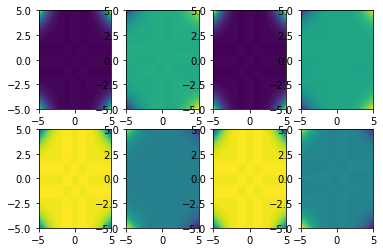

In [14]:
# plot first 8 nontrivial eigenfunctions (+ scaling) like in Williams et al. 2015
x = np.linspace(-5,5,100)
y = np.linspace(-5,5,100)
X, Y = np.meshgrid(x, y)
fig, axs = plt.subplots(2,4)
for i in range(1,9):
    plt.subplot(2,4,i)
    #Dn(X[0,j],X[1,j]) @ eigenvectors[i]
    values = D_xy(x,y,Dn)
    dsa = np.real(values @ eigenvectors[i])
    dsa /= np.linalg.norm(dsa)
    #print(np.dtype(blub))
    #plt.imshow(dsa.reshape((100,100)), interpolation='bilinear')
    plt.contourf(X, Y, dsa.reshape(100,100), 100)
#fig.colorbar(plt.cm.Spectral_r, ax=axs[0,:])

# versuche pot von x,y mit dsa farbkodiert

In [15]:
Dn(-5,-5)

[1,
 -10,
 98,
 -940,
 8812,
 -10,
 100,
 -980,
 9400,
 -88120,
 98,
 -980,
 9604,
 -92120,
 863576,
 -940,
 9400,
 -92120,
 883600,
 -8283280,
 8812,
 -88120,
 863576,
 -8283280,
 77651344]

In [16]:
np.shape(dsa.reshape((100,100)))

(100, 100)

### Task 4: Example from crowd dynamics
No analytical solution? provide an interpretation (and compare to datafold code)